In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
import random

In [3]:
def harris_de(img, window):
    
    img = np.array(img)
#     img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    img_gaussian = cv2.GaussianBlur(img , (3, 3), 0)

    height = img.shape[0] 
    width =  img.shape[1]
#     here we are going to save our corners in a new matrix named corners
    k = 0.04
    threshold = 0.3

   
    
    dy = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=3)
    dx = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=3)
    
   
    dy2 = np.square(dy)
    dx2 = np.square(dx)
    
    dxy = dx*dy

    offset = int(window / 2)
   
    corners = np.zeros((height, width))
    for i in range( int(window / 2), height- int(window / 2)):
        for j in range( int(window / 2), width- int(window / 2)):
            
            Iy2 = np.sum(dy2[i- int(window / 2):i+1+ int(window / 2), j- int(window / 2):j+1+ int(window / 2)])
            Ix2 = np.sum(dx2[i- int(window / 2):i+1+ int(window / 2), j- int(window / 2):j+1+ int(window / 2)])
            Ixy = np.sum(dxy[i- int(window / 2):i+1+ int(window / 2), j- int(window / 2):j+1+ int(window / 2)])

#         here we define a hessian matrix 
            H = np.array([[Ix2,Ixy], [Ixy, Iy2]])

#            here we must calculate the det and tr of matris snd then we can undrsayan is this point is
#            a corner o an edge 
            det = np.linalg.det(H)
            tr = np.matrix.trace(H)
            R = det-k*(tr**2)
            corners[i-int(window / 2), j-int(window / 2)] = R

  
    cv2.normalize(corners, corners, 0, 1, cv2.NORM_MINMAX)
    for y in range( int(window / 2), height- int(window / 2)):
        for x in range( int(window / 2), width- int(window / 2)):
            value = corners[y, x]
            if value > threshold:
                # cornerList.append([x, y, value])
                cv2.circle(img, (x, y), 3, (0, 255, 0))

    return img

Text(0.5, 1.0, 'scale 4')

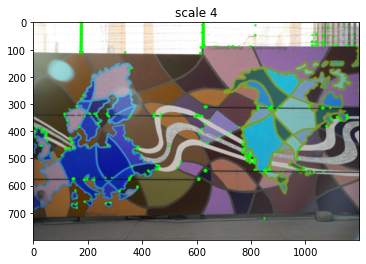

In [4]:

harris1 = cv2.imread('harris.jpg')

img_scaled = cv2.resize( np.copy(harris1), None, fx=2, fy=2)
# plt.imshow(img_scaled)
harris_with_key_points =  harris_de(img_scaled, window=5)
plt.imshow(harris_with_key_points)
plt.title("scale 4")

Text(0.5, 1.0, 'scale 1')

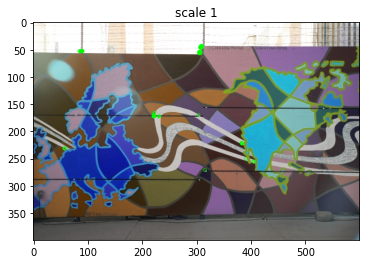

In [11]:
img_scaled = cv2.resize( np.copy(harris1), None, fx=1, fy=1)
harris_with_key_points =  harris_de(img_scaled, window=5)
plt.imshow(harris_with_key_points)
plt.title("scale 1")

Text(0.5, 1.0, 'scale 0.7')

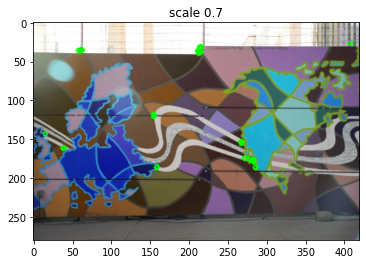

In [47]:
img_scaled = cv2.resize( np.copy(harris1), None, fx=0.7, fy=0.7)
harris_with_key_points =  harris_de(img_scaled, window=5)
plt.imshow(harris_with_key_points)
plt.title("scale 0.7")

Text(0.5, 1.0, 'scale 0.5')

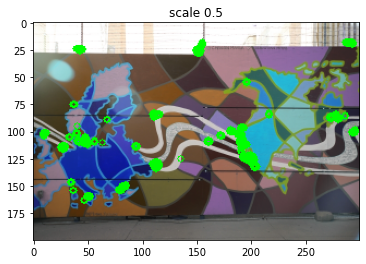

In [49]:
img_scaled = cv2.resize( np.copy(harris1), None, fx=0.5, fy=0.5)
harris_with_key_points =  harris_de(img_scaled, window=5)
plt.imshow(harris_with_key_points)
plt.title("scale 0.5")

In [5]:
# construct a SIFT object
sift = cv2.SIFT_create()
# sift = cv2.xfeatures2d.SURF_create()






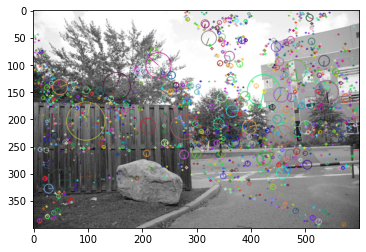

In [15]:
img = cv2.imread('sl.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Here for finding the Keypoints and desciptor with SIFT method we use Open Cv library
# in this library we have a sift method and it can find all of the keypoints and descriptor in the object with 
# sift.detectAndCompute whitch sift is a sift_creat object from this library
# find keypoints and descriptors
KeyPointsl , Descriptorl = sift.detectAndCompute(img_gray.copy(),None)
img=cv2.drawKeypoints(img_gray.copy(),KeyPoints,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)


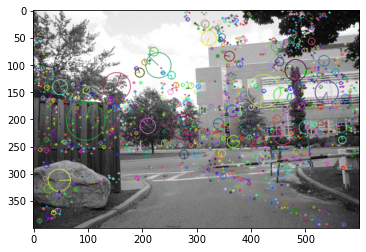

In [16]:
img_1 = cv2.imread('sm.jpg')
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

KeyPointsm , Descriptorm = sift.detectAndCompute(img_1_gray.copy(),None)
img=cv2.drawKeypoints(img_1_gray.copy(),KeyPoints,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)

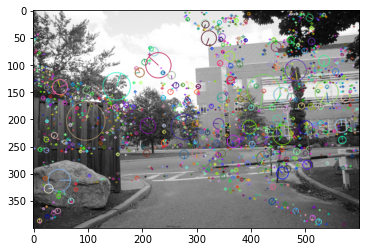

In [17]:
img_2 = cv2.imread('sr.jpg')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

KeyPointsr , Descriptorr = sift.detectAndCompute(img_2_gray.copy(),None)
img=cv2.drawKeypoints(img_1_gray.copy(),KeyPoints,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)

In [9]:
# and here we are going to match these featuers 
def matcher(image1,image2):
    threshold=0.7
    objectbf = cv2.BFMatcher()
   
    matches = objectbf.knnMatch(image1,image2, k=2)

    Points = []
    matches1 = []
    
    for m in matches:
       
        if len(m) == 2 and m[0].distance < threshold * m[1].distance:
            Points.append(m[0])
            matches1.append([m[0]])

    return Points , matches



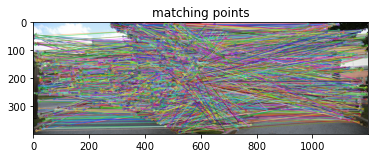

In [22]:
#  here we are going to mathch the features between the pectures sr & sm
mathcs , depedency = matcher(Descriptorr,Descriptorm)


matches1 = []
for pair in mathcs:
    matches1.append(list(KeyPointsr[pair.queryIdx].pt + KeyPointsm[pair.trainIdx].pt))

matches = np.array(matches1 )

matchs_i = cv2.drawMatchesKnn(img_2.copy(),KeyPointsr,img_1.copy(),KeyPointsm,depedency,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matchs_i)
plt.title('matching points')
plt.show()

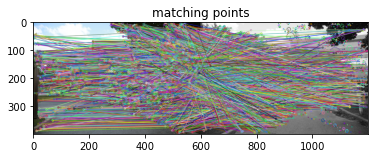

In [23]:
#  here we are going to mathch the features between the pectures sr & sl
mathcs , depedency = matcher(Descriptorr,Descriptorl)


matches1 = []
for pair in mathcs:
    matches1.append(list(KeyPointsr[pair.queryIdx].pt + KeyPointsl[pair.trainIdx].pt))

matches = np.array(matches1 )

matchs_i = cv2.drawMatchesKnn(img_2.copy(),KeyPointsr,img.copy(),KeyPointsl,depedency,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matchs_i)
plt.title('matching points')
plt.show()

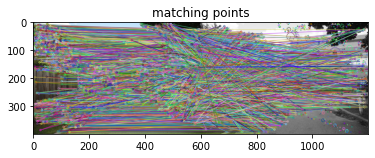

In [36]:
mathcs , depedency = matcher(Descriptorm,Descriptorl)


matches1 = []
for pair in mathcs:
    matches1.append(list(KeyPointsm[pair.queryIdx].pt + KeyPointsl[pair.trainIdx].pt))

matches = np.array(matches1 )

matchs_i = cv2.drawMatchesKnn(img_1.copy(),KeyPointsm,img.copy(),KeyPointsl,depedency,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matchs_i)
plt.title('matching points')
plt.show()

In [37]:
# SURF we dont have this function in Open cv so we use ORB insted
fast = cv2.ORB_create(nfeatures=1000)

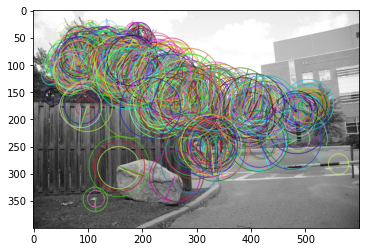

In [39]:
surfl = cv2.imread('sl.jpg')
surfl = cv2.cvtColor(surfl, cv2.COLOR_BGR2RGB)
surfl = cv2.cvtColor(surfl, cv2.COLOR_BGR2GRAY)

# find keypoints and descriptors
keypointsl , desciptorl = fast.detectAndCompute(surfl.copy(),None)

img=cv2.drawKeypoints(surfl.copy(),keypointsl,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)

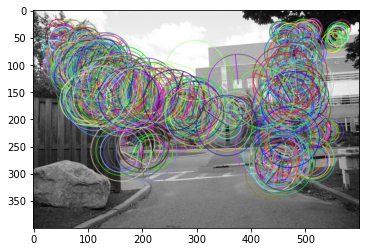

In [41]:
surfm = cv2.imread('sm.jpg')
surfm = cv2.cvtColor(surfm, cv2.COLOR_BGR2RGB)
surfm = cv2.cvtColor(surfm, cv2.COLOR_BGR2GRAY)

# find keypoints and descriptors
keypointsm , desciptorm = fast.detectAndCompute(surfm.copy(),None)

img_m=cv2.drawKeypoints(surfm.copy(),keypointsm,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_m)

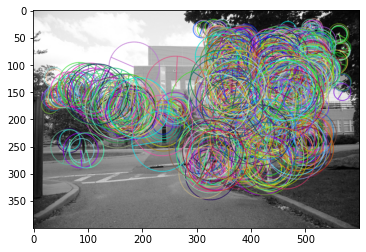

In [42]:
surfr = cv2.imread('sr.jpg')
surfr = cv2.cvtColor(surfr, cv2.COLOR_BGR2RGB)
surfr = cv2.cvtColor(surfr, cv2.COLOR_BGR2GRAY)


keypointsr , desciptorr = fast.detectAndCompute(surfr.copy(),None)

img_r=cv2.drawKeypoints(surfr.copy(),keypointsr,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_r)

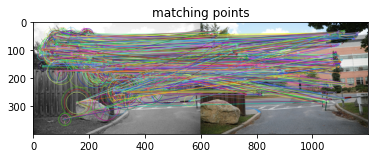

In [45]:
# now we are going to match them
mathcs , depedency = matcher(desciptorl,desciptorm)


matches1 = []
for pair in mathcs:
    matches1.append(list(keypointsl[pair.queryIdx].pt + keypointsm[pair.trainIdx].pt))

matches = np.array(matches1 )

matchs_i = cv2.drawMatchesKnn(img.copy(),keypointsl,img_1.copy(),keypointsm,depedency,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matchs_i)
plt.title('matching points')
plt.show()

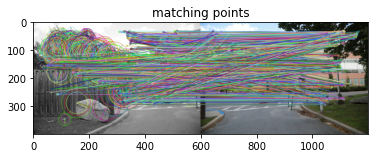

In [46]:
mathcs , depedency = matcher(desciptorr,desciptorm)


matches1 = []
for pair in mathcs:
    matches1.append(list(keypointsr[pair.queryIdx].pt + keypointsm[pair.trainIdx].pt))

matches = np.array(matches1 )

matchs_i = cv2.drawMatchesKnn(img.copy(),keypointsr,img_2.copy(),keypointsm,depedency,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matchs_i)
plt.title('matching points')
plt.show()